# **Ejercicio: Análisis y Visualización de Datos desde un CSV**

### Prof. Andrés Mena Abarca

**Objetivo:**  
Leer datos de un archivo CSV, realizar un análisis exploratorio y crear diferentes gráficos para visualizar la información utilizando Pandas y Matplotlib.

# Estudiante: 

In [4]:
# Importar la biblioteca pandas, que se utiliza para manipular y analizar datos estructurados.
import pandas as pd

# Definir la ruta del archivo CSV que contiene los datos.
# Aquí se especifica el nombre del archivo (puede ser relativo o absoluto).
ruta_archivo_csv = "nacimientos_defunciones.csv"

# Leer el archivo CSV en un DataFrame de pandas.
# El parámetro `delimiter=','` indica que las columnas están separadas por comas (formato CSV estándar).
df = pd.read_csv(ruta_archivo_csv, delimiter=',')

# Mostrar el contenido del DataFrame cargado.
# Esto permite visualizar los datos en forma tabular (filas y columnas).
df


,Año,Nacimientos,Defunciones
0,1950,37248,9769
1,1951,39239,9631
2,1952,42461,9902
3,1953,42817,10312
4,1954,48157,9713
...,...,...,...
67,2017,68811,23246
68,2018,68449,23806
69,2019,64274,24292
70,2020,57848,26205


## **Limpiar y procesar el DataFrame**

El DataFrame `df` tiene las siguientes columnas:

- **Año**: Esta columna contiene los años correspondientes a los registros demográficos.
- **Nacimientos**: Esta columna contiene la cantidad de nacimientos registrados en el año.
- **Defunciones**: Esta columna contiene la cantidad de defunciones registradas en el año.
- **Unnamed: x**: (si existieran columnas adicionales) Estas columnas contienen datos no deseados o nulos y deben ser eliminadas para limpiar el DataFrame.

### **Pasos para la limpieza y procesamiento:**

1. **Eliminar columnas innecesarias**: Si hay columnas como `Unnamed: x`, eliminarlas del DataFrame.
2. **Eliminar filas nulas o no válidas**: Asegurarse de que los valores en las columnas relevantes no contengan datos faltantes.
3. **Convertir los datos a tipos adecuados**: Verificar y convertir las columnas numéricas a su formato correcto (por ejemplo, `int` o `float` para los valores numéricos).
4. **Guardar el DataFrame limpio**: Exportar el resultado a un nuevo archivo CSV para análisis posterior.

In [5]:
print('Shape: ',df.shape)
print('Columnas: ', df.columns)
print('Tipado: \n', df.dtypes)

Shape:  (72, 3)
Columnas:  Index(['Año', 'Nacimientos', 'Defunciones'], dtype='object')
Tipado: 
 Año            int64
Nacimientos    int64
Defunciones    int64
dtype: object


In [6]:
# Eliminar filas con valores nulos en cualquier columna
df.dropna(inplace=True)

df.head()

,Año,Nacimientos,Defunciones
0,1950,37248,9769
1,1951,39239,9631
2,1952,42461,9902
3,1953,42817,10312
4,1954,48157,9713


### **1\. Gráfico de líneas: Nacimientos y Defunciones por año**

### 

Este gráfico muestra la tendencia de nacimientos y defunciones a lo largo de los años.

1. grafico de lineas: nacimientos y defunciones por a;o 

Este grafico muestra la tendencia de nacimientos y defunciones a lo largo de los a;os

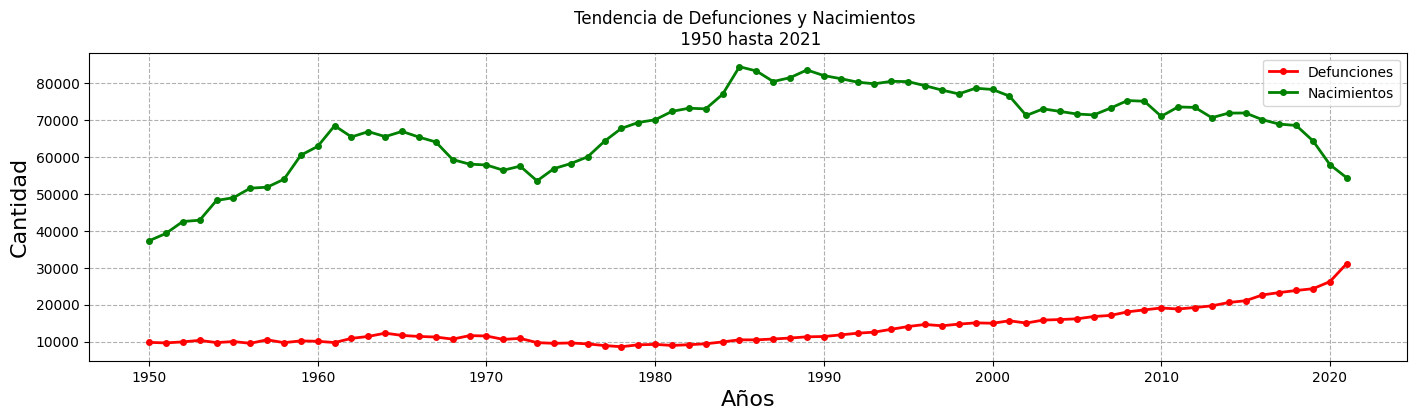

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize = (17,4))
#el eje Y defunciones
#Eje X anios

plt.plot(df['Año'],df['Defunciones'],marker='o',markersize="4",lw=2, color='red',label='Defunciones')
plt.plot(df['Año'],df['Nacimientos'],marker='o',markersize="4",lw=2, color='green',label='Nacimientos')

plt.grid(linestyle='--') #linegrid crea rejillas

plt.title(f'Tendencia de Defunciones y Nacimientos \n {df['Año'].min()} hasta {df['Año'].max()}')
plt.xlabel("Años", fontsize=16)
plt.ylabel("Cantidad", fontsize=16)
plt.legend()

#los data frames tienen multiples columnas entonces yo debo decirle quien es X y Y, debo de ser ordenada con los ejes, primero va Y y luego X
#biblioteca para hacer lineas de tendencia en una grafica seaborn

### **2\. Selección y Filtrado de Datos**

**Objetivo:** Practicar la selección de columnas y el filtrado de filas.

1. **Seleccionar columnas específicas:**

In [8]:
# Seleccionar las columnas de Año y Nacimientos
filtro = ['Año', 'Nacimientos']
df[filtro]

,Año,Nacimientos
0,1950,37248
1,1951,39239
2,1952,42461
3,1953,42817
4,1954,48157
...,...,...
67,2017,68811
68,2018,68449
69,2019,64274
70,2020,57848


In [9]:
# Filtrar datos desde el año 2010

#opcion 1
df_filtrado = df[df['Año']>= 2010]
df_filtrado

#opcion 2
#df_filtrado = df.loc[df['Año' >= 2010]]

,Año,Nacimientos,Defunciones
60,2010,70922,19077
61,2011,73459,18801
62,2012,73326,19200
63,2013,70550,19646
64,2014,71793,20560
65,2015,71819,21038
66,2016,70004,22601
67,2017,68811,23246
68,2018,68449,23806
69,2019,64274,24292


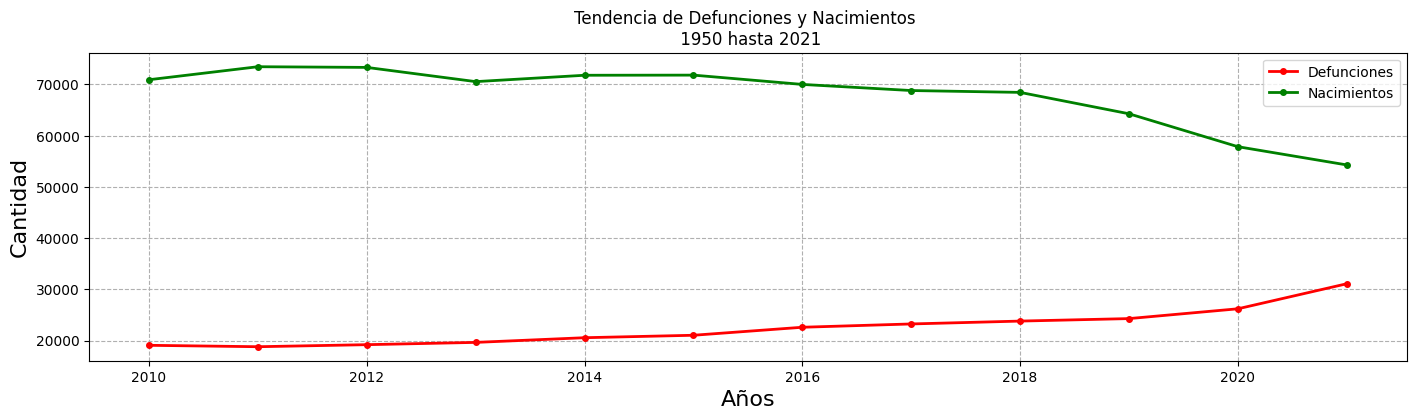

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize = (17,4))
#el eje Y defunciones
#Eje X anios

plt.plot(df_filtrado['Año'],df_filtrado['Defunciones'],marker='o',markersize="4",lw=2, color='red',label='Defunciones')
plt.plot(df_filtrado['Año'],df_filtrado['Nacimientos'],marker='o',markersize="4",lw=2, color='green',label='Nacimientos')

plt.grid(linestyle='--') #linegrid crea rejillas

plt.title(f'Tendencia de Defunciones y Nacimientos \n {df['Año'].min()} hasta {df['Año'].max()}')
plt.xlabel("Años", fontsize=16)
plt.ylabel("Cantidad", fontsize=16)
plt.legend()


### **3\. Operaciones Básicas**

**Objetivo:** Realizar cálculos básicos utilizando las columnas del DataFrame.

1. **Calcular el total de nacimientos y defunciones:**

In [11]:
# total_nacimientos
total_nacimientos = df['Nacimientos'].sum()
# total_defunciones 
total_defunciones = df['Defunciones'].sum() #puede ser mean o lo que se pida

print(f'Total de nacimientos: {total_nacimientos}')
print(f'Total de defunciones: {total_defunciones}')

Total de nacimientos: 4846207
Total de defunciones: 975501


**2\. Añadir una nueva columna con el saldo poblacional :**

In [12]:
#Saldo Poblacional
df['saldo_poblacional'] = df['Nacimientos'] - df['Defunciones']
df

,Año,Nacimientos,Defunciones,saldo_poblacional
0,1950,37248,9769,27479
1,1951,39239,9631,29608
2,1952,42461,9902,32559
3,1953,42817,10312,32505
4,1954,48157,9713,38444
...,...,...,...,...
67,2017,68811,23246,45565
68,2018,68449,23806,44643
69,2019,64274,24292,39982
70,2020,57848,26205,31643


### **Creación de Gráficos con Matplotlib**

**Objetivo:** Introducir la visualización básica de datos con Matplotlib.

1. **Gráfico de líneas: Nacimientos por año**

In [13]:
import matplotlib.pyplot as plt


In [14]:
import matplotlib.pyplot as plt


anio_filtrar = int(input('Ingrese el año a Graficar: '))


#df >= anio_inicial and <= anio_final
                                            #  and
df_rango_anios = df[df['Año'] == anio_filtrar ]


df_rango_anios

,Año,Nacimientos,Defunciones,saldo_poblacional
60,2010,70922,19077,51845


<function matplotlib.pyplot.show(close=None, block=None)>

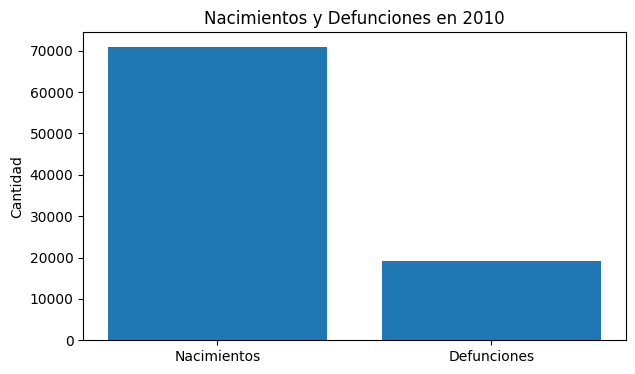

In [21]:
import matplotlib.pyplot as plt


anio_filtrar = int(input('Ingrese el año a Graficar: '))


#df >= anio_inicial and <= anio_final
                                            #  and
df_rango_anios = df[df['Año'] == anio_filtrar ]


plt.figure(figsize=(7,4))
plt.bar(['Nacimientos','Defunciones'], [df_rango_anios['Nacimientos'].values[0],
        df_rango_anios['Defunciones'].values[0]])
plt.show

plt.title(f"Nacimientos y Defunciones en {df_rango_anios['Año'].values[0]}")
plt.ylabel('Cantidad')
plt.show


### **Gráfico de barras: Comparación de nacimientos y defunciones**

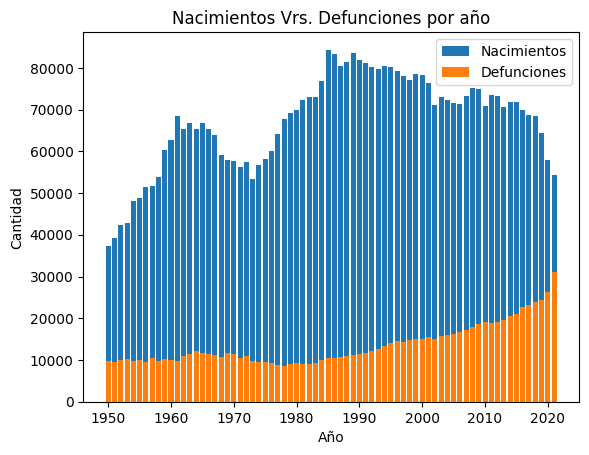

<Figure size 1700x700 with 0 Axes>

In [ ]:
# Crear un doble gráfico de barras

plt.bar(df['Año'],df['Nacimientos'], label= 'Nacimientos')
plt.bar(df['Año'],df['Defunciones'], label= 'Defunciones') 
plt.legend()
plt.title('Nacimientos Vrs. Defunciones por año')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.figure(figsize=(17,7))
plt.show()



In [28]:
# Filtrar datos del último año
ultimo_anio = df[df['Año'] == df['Año'].max()]
ultimo_anio
# Crear gráfico de barras



,Año,Nacimientos,Defunciones,saldo_poblacional
71,2021,54288,31093,23195


### **<mark>TAREA SEMANA 12</mark>**

**Objetivo:** Combinar la manipulación de datos con visualización.

#### **Enunciado:**

1. Filtra los datos desde el año 2000.
2. Calcula el promedio de nacimientos y defunciones desde esa fecha.
3. Crea un gráfico de líneas que compare nacimientos y defunciones desde el año 2000.

#### **Solución:**

1. **Filtrar datos desde el año 2000:**

In [33]:
df_filtrado = df[df['Año'] >= 2010]

df_filtrado.head()

,Año,Nacimientos,Defunciones,saldo_poblacional
60,2010,70922,19077,51845
61,2011,73459,18801,54658
62,2012,73326,19200,54126
63,2013,70550,19646,50904
64,2014,71793,20560,51233


2. **Calcular promedios:**

In [ ]:
df_filtrado = df[df['Año'] >= 2010]
prom_nacimientos = df_filtrado['Nacimientos'].mean()
prom_defunciones = df_filtrado['Defunciones'].mean()

print(f'El promedio de nacimientos a partir del 2010 es de {prom_nacimientos:.2f}')
print(f'El promedio de defunciones a partir del 2010 es de {prom_defunciones:.2f}')


El promedio de nacimientos a partir del 2010 es de 67961.92
El promedio de defunciones a partir del 2010 es de 22463.75


3. **Graficar:**

C:\Users\salas\AppData\Local\Temp\ipykernel_26884\2710817349.py:11: MatplotlibDeprecationWarning: Passing the explode parameter of pie() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.pie(data, [0,0.1], etiquetas, color, autopct= '%1.1f%%', startangle = 90) #esta es la estructura, el [0, 0.1] es para separar un trozo del pastel


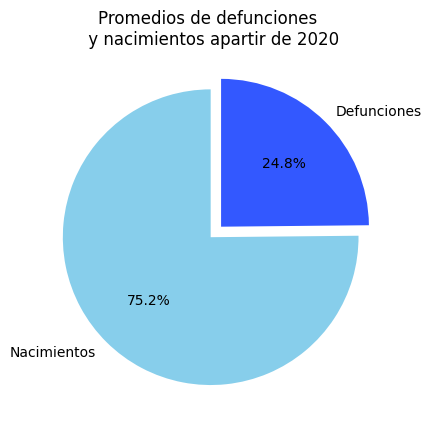

In [43]:
#graficar en Pie
df_filtrado = df[df['Año'] >= 2010]
prom_nacimientos = df_filtrado['Nacimientos'].mean()
prom_defunciones = df_filtrado['Defunciones'].mean()

etiquetas = ['Nacimientos', 'Defunciones'] 
data = [prom_nacimientos, prom_defunciones]
color = ['skyblue', '#3358ff']


plt.pie(data, [0,0.1], etiquetas, color, autopct= '%1.1f%%', startangle = 90) #esta es la estructura, el [0, 0.1] es para separar un trozo del pastel
plt.title('Promedios de defunciones \n y nacimientos apartir de 2020')
plt.show()
